In [2]:
# step 0: download video
# video_url = 'https://storage.googleapis.com/cloud-tpu-checkpoints/efficientdet/data/video480p.mov'  # @param
# !wget {video_url} -O input.mov

# Step 1: export model
saved_model_dir = 'saved_model/model_integer_quant.tflite'
# !rm -rf {saved_model_dir}

# !python3 model_inspect.py --runmode=saved_model \
#   --model_name=efficientdet-d0 --ckpt_path=efficientdet-d0 \
#   --saved_model_dir={saved_model_dir} --hparams="mixed_precision=true"

# Step 2: do inference with saved model using saved_model_video
!python3 model_inspect.py --runmode=saved_model_video \
  --model_name=efficientdet-d0   --ckpt_path=efficientdet-d0 \
  --saved_model_dir={saved_model_dir} --hparams="mixed_precision=true" \
  --input_video=input.mov --output_video=output.mov
# Then you can view the output.mov


2021-01-26 16:31:05.050141: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-01-26 16:31:05.050166: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-01-26 16:31:06.137090: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-26 16:31:06.137263: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-01-26 16:31:06.137273: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-01-26 16:31:06.137287: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running 

In [1]:
!rm  -rf savedmodeldir
!python3 model_inspect.py --runmode=saved_model --model_name=efficientdet-d0 \
  --ckpt_path=efficientdet-d0 --saved_model_dir=savedmodeldir \
  --tensorrt=FP32  --tflite_path=efficientdet-d0.tflite \
  --hparams=voc_config.yaml


2021-01-31 22:21:20.763921: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-01-31 22:21:20.764045: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-01-31 22:21:22.795885: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-31 22:21:22.797098: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-01-31 22:21:22.797109: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-01-31 22:21:22.797127: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running 

2021-01-31 22:21:55.571015: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-31 22:21:59.837399: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-31 22:22:04.149222: I tensorflow/core/grappler/devices.cc:69] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2021-01-31 22:22:04.149297: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2021-01-31 22:22:04.149483: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-31 22:22:06.736578: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:928] Optimization results for grappler item: graph_to_optimize
  function_optimizer: Graph size after: 22003 nodes (0), 35872 edges (0), time = 262.087ms.
  function_optimizer: Graph size after: 22003 nodes (0), 35872 edges (0), time = 304.771ms.
Optimizatio

2021-01-31 22:22:08.847740: I tensorflow/core/grappler/devices.cc:69] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2021-01-31 22:22:08.847828: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2021-01-31 22:22:08.847991: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-31 22:22:08.960711: E tensorflow/core/grappler/grappler_item_builder.cc:669] Init node efficientnet-b0/stem/conv2d/kernel/Assign doesn't exist in graph
2021-01-31 22:22:09.472099: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:316] Ignored output_format.
2021-01-31 22:22:09.472125: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:319] Ignored drop_control_dependency.
Traceback (most recent call last):
  File "/home/user/.local/lib/python3.8/site-packages/tensorflow/lite/python/convert.py", line 210, in toco_convert_protos
    model_str = wrap_toco.wrapped_toco

In [1]:
import tensorflow as tf

saved_model_dir = 'savedmodel'

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) # path to the SavedModel directory
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.inference_input_type = tf.int8  # or tf.uint8
converter.inference_output_type = tf.int8  # or tf.uint8
tflite_model = converter.convert()


# Save the model.
with open('model_output/model.tflite', 'wb') as f:
    f.write(tflite_model)


ValueError: The inference_input_type and inference_output_type must be tf.float32.

In [6]:
import tensorflow as tf

print(tf.__version__)

2.4.0


mkdir: cannot create directory ‘serve_image_out’: File exists
2021-01-03 22:11:43.856398: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-01-03 22:11:43.856417: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-01-03 22:11:44.903971: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-03 22:11:44.904055: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-01-03 22:11:44.904064: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-01-03 22:11:44.904073: I tensorflow/stream_executor/cuda/cuda_di

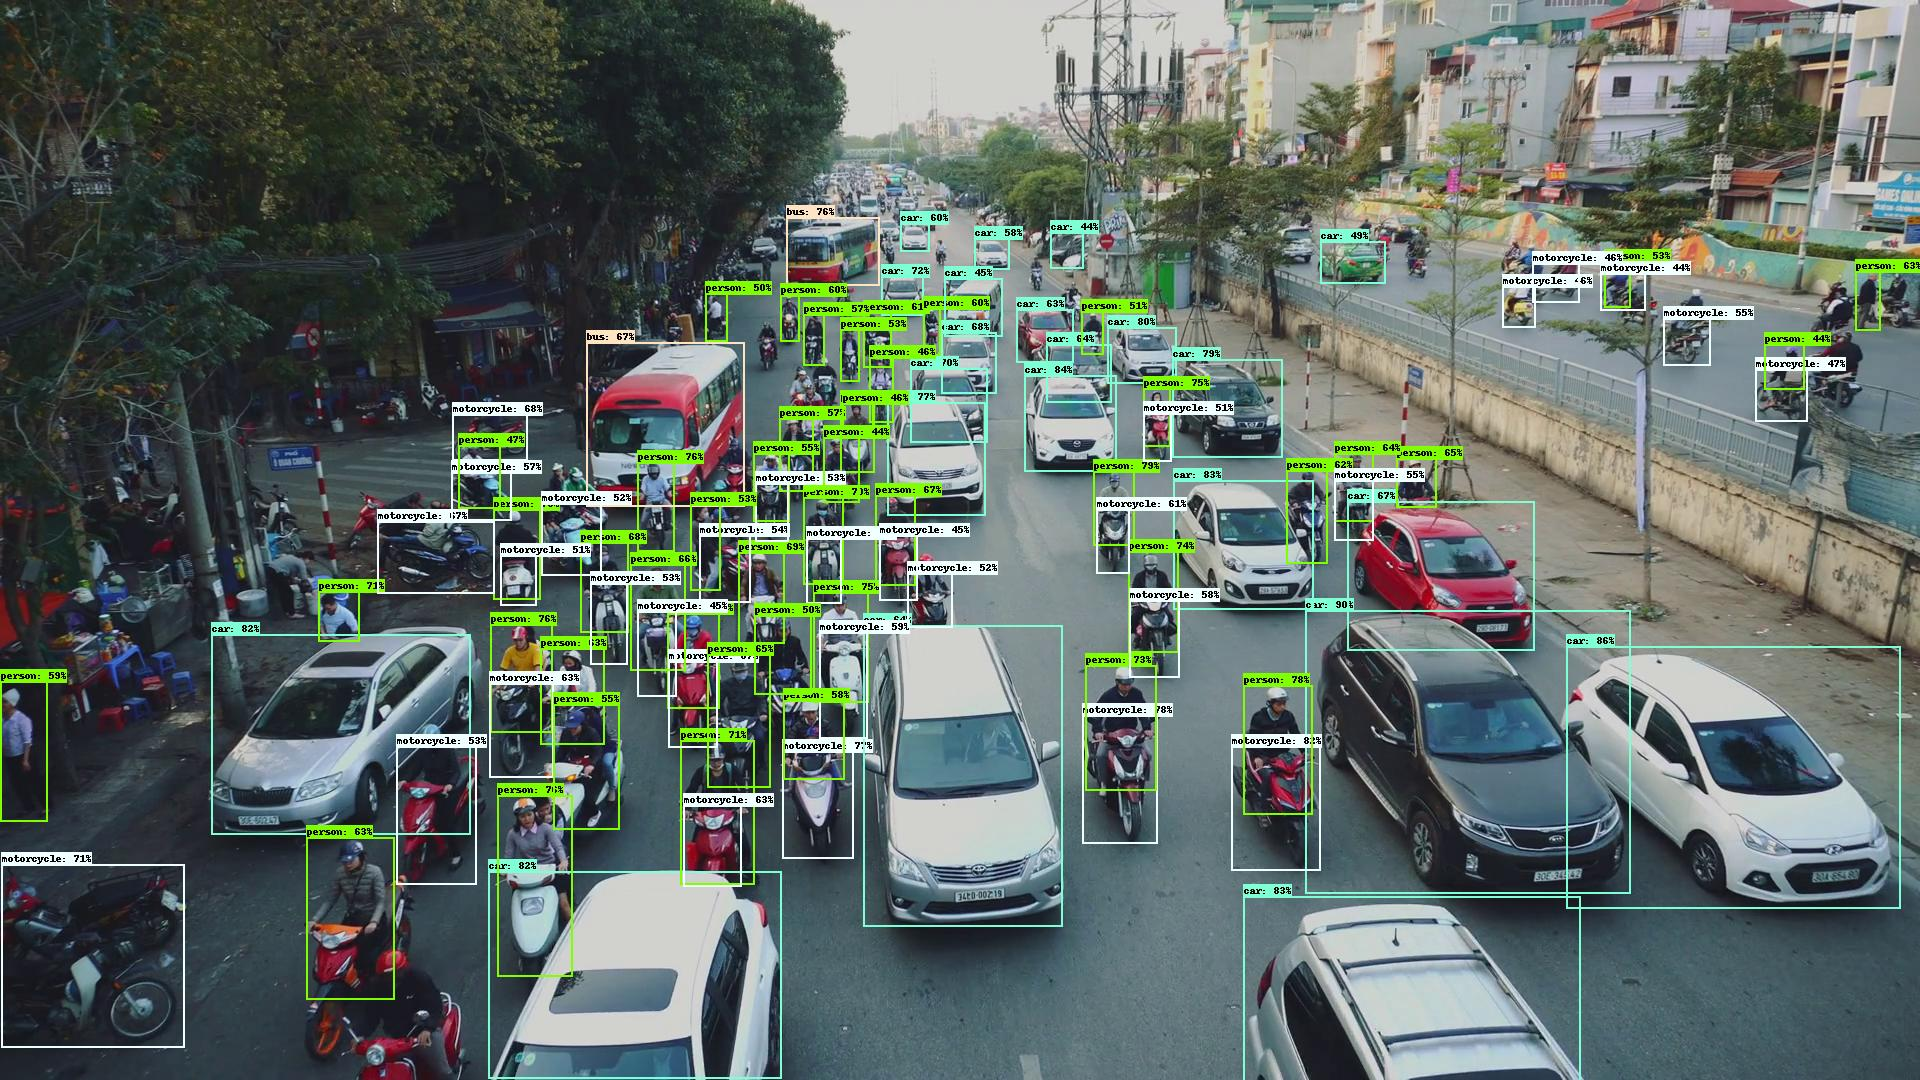

In [2]:
# In case you need to specify different image size or batch size or #boxes, then
# you need to export a new saved model and run the inferernce.

import os

serve_image_out = 'serve_image_out'
!mkdir {serve_image_out}
saved_model_dir = 'savedmodel'
!rm -rf {saved_model_dir}

# Step 1: export model
!python3 model_inspect.py --runmode=saved_model \
  --model_name=efficientdet-d0 --ckpt_path=efficientdet-d0 \
  --hparams="image_size=1920x1280" --saved_model_dir={saved_model_dir}

# Step 2: do inference with saved model.
!python3 model_inspect.py --runmode=saved_model_infer \
  --model_name=efficientdet-d0 --saved_model_dir={saved_model_dir} \
  --input_image=img.png --output_image_dir={serve_image_out} \
  --min_score_thresh={min_score_thresh}  --max_boxes_to_draw={max_boxes_to_draw}

from IPython import display
display.display(display.Image(os.path.join(serve_image_out, '0.jpg')))
